# 데이터 준비
- 딥러닝 모델에 데이터를 넣기 위한 준비 과정
  - 데이터를 pytorch 가 이해할 수 있게끔 바꾸는게 중요

- **Dataset** : 데이터를 불러 오는 규칙이 들어있는 클래스  
- **DataLoader** : dataset에서 데이터를 꺼내서 모델에 넘기기 좋게 작은 묶음
- **transform** : 데이터를 불러올 때 자동으로 전처리(변환) 해주는 기능
- **torchvision** : pytorch에서 제공하는 이미지 관련 데이터셋과 기능 모음집

(batch)로 만들어줌
- 파이토치에서는 데이터 준비를 위해 torch.utils.data 의 Dataset 과 DataLoader 사용 가능
    - Dataset에는 다양한 데이터셋이 존재한다 (MNIST , FashionMNIST, CIFAR10, ,,,)
        - Vision dataset :
        - text dataset :
        - audio dataset
    - DataLoader와 Dataset을 통해 batch_size, train 여부, transform 등을 인자로 넣어 데이터를 어떻게 load 할 것인지 정해줄 수 있다.

In [3]:
#파이토치의 데이터 관련 도구들 불러옴
from torch.utils.data import Dataset, DataLoader

### 토치 비전(torchvision)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지
- transforms : 전처리할 때 사용하는 메소드
- transforms 에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행

In [2]:
import torchvision.transforms as transforms #유명한 데이터셋들이 들어있음
from torchvision import datasets

- dataloader의 인자로 들어갈 transform을 미리 정의할 수 있고, compose를 통해 리스트 안에 순서대로 전처리 진행
  - **compose** : 전처리 작업들을 차례대로 묶은 리스트
- ToTensor()를 하는 이유는 torchvision이 PIL Image 형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor 형으로 변환 필요
  - torchvision 같은 데이터셋은 이미지를 PIL 이미지 형식으로 제공함. 하지만 ***PYTORCH는 Tensor 만 이해함 -> 그래서 transforms.ToTensor() 로 이미지를 텐서로 변환***

In [4]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(mean=(0.5,), std=(1.0,))])

In [5]:
#데이터 다운로드 하기
trainset = datasets.MNIST(root='/content/',
                          train = True, download=True,
                          transform=mnist_transform)

testset = datasets.MNIST(root='/content/',
                          train = False, download=True,  #test셋은 train = false로 해야 작동
                          transform=mnist_transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 59.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.69MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 12.4MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.12MB/s]


- DataLoader는 데이터 전체를 보관했다가 실제 모델 학습을 할 때, batch_size 크기만큼 데이터를 가져온다

In [6]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2) #8개씩 뒤섞어서 가져와 (실제 동작하는 Worker는 2개)
test_loader = DataLoader(testset, batch_size=32, shuffle=False, num_workers=2) #테스트니까 셔플 펄스

- train_loader 는 반복적으로 batch 사이즈만큼 데이터를 가져옴 (즉, '반복 가능한 객체')
  - 즉, for문으로도 가능함 .
  - for문 안쓰고 iter()와 next()를 쓰는 이유는, 직접 한 묶음만 뽑아보고 확인 가능 (디버깅(모양확인) 또는 초기 테스트용)
- iter(train_loader)는 그 반복 가능한 객체에서 '반복기(iterator)' 를 만들어줌
  - 그걸 변수 dataiter에 저장
- next() ?
  - next(dataiter)는 dataiter라는 반복기로 다음 묶음을 꺼낼 때 사용한다

In [8]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images.shape, labels.shape
#batch 사이즈 8개

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [10]:
import torch

torch_image = torch.squeeze(images[0]) #차원 축소는 squeeze
torch_image.shape
# 1, 28, 28 에서 0번째 차원 축소

torch.Size([28, 28])

- trainset 확인해보기
  - 모델은 이 이미지를 입력으로 넣었을 때 어떤 숫자인지 '숫자'를 출력한다

<function matplotlib.pyplot.show(close=None, block=None)>

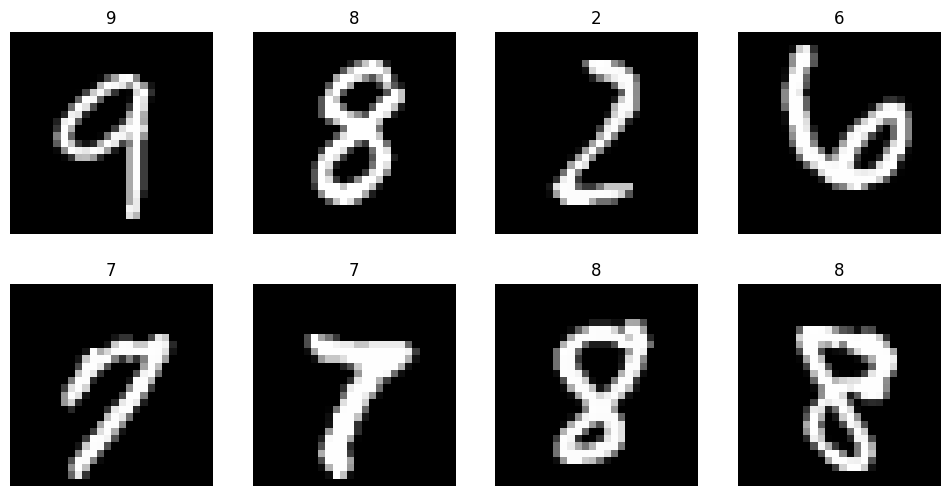

In [11]:
#trainset 확인해보기
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12,6))
cols, rows = 4,2
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(trainset), size=(1, )).item()
  img, label = trainset[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis('off') #어차피 그림이니 축 x
  plt.imshow(img.squeeze(), cmap='gray')
plt.show

---
- 과정 정리
  - 딥러닝 모델에 사진을 넣으려면,
    - 데이터셋 불러오고
    - ToTensor 로 텐서로 바꾸고,
    - dataloader로 작은 덩어리(batch)로 묶고,
    - 모델에 학습

---

# 신경망 구성

- 레이어(layer) : 신경망의 핵심 데이터 구조. 하나 이상의 텐서를 입력받아 하나 이상의 텐서 출력하는 역할 수행
- 모듈(module) : 한개 이상의 계층이 모여서 구성
- 모델(model) : 한개 이상의 모듈이 모여서 구성
---
- 즉, 레이어가 모여 모듈이 되고, 모듈이 모여 모델이 된다

### torch.nn 패키지
- 주로 가중치(weight), 편향(bias) 값들이 내부에서 '자동으로' 생성되는 레이어들을 사용할 때 사용
  - 원래 보통 weight 값을 직접 입력하진 않음
---
- 딥러닝 모델의 'layer' 만들기
  - nn.Linear : 완전 연결층
  - nn.Conv2d : 합성곱 계층 (이미지 처리용)
    - 이 레이어들이 입력 데이터를 받아 출력을 계산해준다

In [12]:
import torch.nn as nn

### nn.Linear - 완전 연결층(fully connected layer)

- nn.Linear 계층 예제
  - nn.Linear(20,30) 의미 ?
    - 입력 20개 숫자
    - 출력 30개 숫자
    - 이 레이어는 내부적으로 가중치, 편향을 자동으로 만든다

In [14]:
input = torch.randn(128,20) #배치크기 128, 특성 20개
print(input)

m = nn.Linear(20,30)
print(m)

output = m(input) #input을 넣으면 output이 나온다
print(output)
print(output.size())

tensor([[-5.1996e-01,  1.2805e+00, -1.5250e+00,  ..., -5.5426e-01,
          5.2381e-01, -5.4623e-01],
        [-1.1107e+00, -4.5825e-02, -1.1534e+00,  ...,  3.1676e-01,
         -9.1177e-01,  4.0221e-01],
        [-3.9235e-01, -4.3366e-01, -1.3172e+00,  ..., -1.4050e+00,
         -9.6445e-01, -9.2931e-01],
        ...,
        [ 8.5939e-02, -8.6261e-02,  6.1812e-01,  ..., -4.2447e-04,
         -9.5309e-01,  1.0584e+00],
        [ 1.3690e+00,  1.2837e+00,  9.6494e-02,  ..., -2.1920e-01,
         -1.0806e-01,  2.9474e-03],
        [-5.4444e-01,  2.6767e-01,  1.5400e+00,  ..., -8.5299e-01,
         -1.1350e+00, -1.1506e+00]])
Linear(in_features=20, out_features=30, bias=True)
tensor([[ 0.4431, -0.3291, -0.9048,  ...,  0.4861,  0.3575,  1.2110],
        [ 0.7510,  1.0778, -0.7456,  ...,  0.9967, -0.8129, -0.3053],
        [ 0.5583, -0.1140,  0.4659,  ..., -0.5034,  0.4438, -0.2746],
        ...,
        [-0.2637, -0.0650, -0.4300,  ...,  0.3139,  0.2206,  0.3357],
        [-0.5547,  0.702

### nn.Conv2d - 합성곱 계층(이미지용)

- nn.Conv2d 계층 예시
  - nn.Conv2d(16, 33, (3,5), stride=(2,1), padding=(4,2), dilation=(3,1)) ?
    - 입력 채널 16개
    - 출력 채널 33개
    - 커널 크기 3x5 필터
    - stride, padding, dilation은 필터가 움직이는 방식 조정

In [15]:
input = torch.randn(20, 16, 50, 100)
print(input.size())

torch.Size([20, 16, 50, 100])


In [17]:
m = nn.Conv2d(16, 33, 3, stride=2)
m = nn.Conv2d(16, 33, (3,5), stride=(2,1), padding=(4,2))
m = nn.Conv2d(16, 33, (3,5), stride=(2,1), padding=(4,2), dilation=(3,1))  #결국 이 버전으로 사용
print(m)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [18]:
output = m(input)
print(output.size())

torch.Size([20, 33, 26, 100])


# 컨볼루션 레이어(convolution layer)
- 이미지 처리 레이어

- nn.Conv2d 예제
  - in_channels : 입력 이미지의 channel 의 갯수
  - out_channels : 출력 채널 갯수 (필터 수)
  - kernel_size : 커널 사이즈 (필터 크기)  ex) 5 = 5x5 사이즈
  - stride = 필터가 얼마나 건너뛰며 이동할지
- weight 텐서가 곧 '필터'(커널) 이다
  - 이를 수치화, 시각화하려면 numpy로 변환해서 matplotlib 등에 넘긴다

In [19]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [23]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu')) #순서대로 in채널, out채널, 커널사이즈, 스트라이드 값 지정
print(layer)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))


- weight 확인

In [24]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

- weight는 detach를 통해 꺼내줘야 numpy() 변환 가능

In [25]:
weight = weight.detach()

- 필터들을 일반 넘파이 배열로 바꿔야 시각화나 값 확인이 가능하다

In [26]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

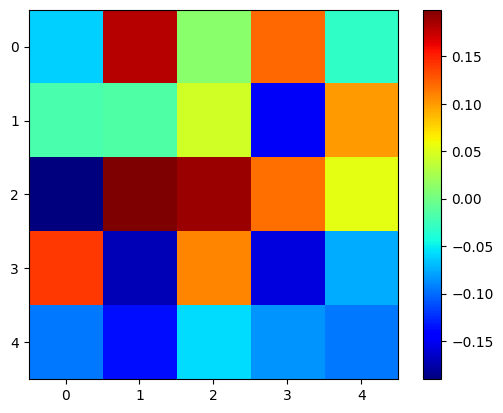

In [28]:
plt.imshow(weight[0, 0, :, :], 'jet') #처음부터 끝까지 웨이트값
plt.colorbar()
plt.show()
#

In [29]:
print(images.shape)
print(images[0].size())
input_image = torch.squeeze(images[0])
print(input_image.size())

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


- 한장의 이미지(images[0])를 conv2d 레이어에 넣어 출력 결과 확인하기
  - conv2d는 4차원 입력이 요구된다

In [30]:
input_data = torch.unsqueeze(images[0], dim=0) #배치 차원 추가 (conv2d는 4차원 입력 요)
print(input_data.size())

output_data = layer(input_data) #1장의 이미지를 conv2d 레이어에 통과시킨다
output = output_data.data
output_arr = output.numpy()
output_arr.shape

#(1, 20, 24, 24) : 1(배치크기), 20(필터 수), 24,24(출력 이미지 크기(24x24))
# 즉, 이미지 한장을 20개의 필터로 처리한 결과, 20개의 24x24 특성맵이 된다

torch.Size([1, 1, 28, 28])


(1, 20, 24, 24)

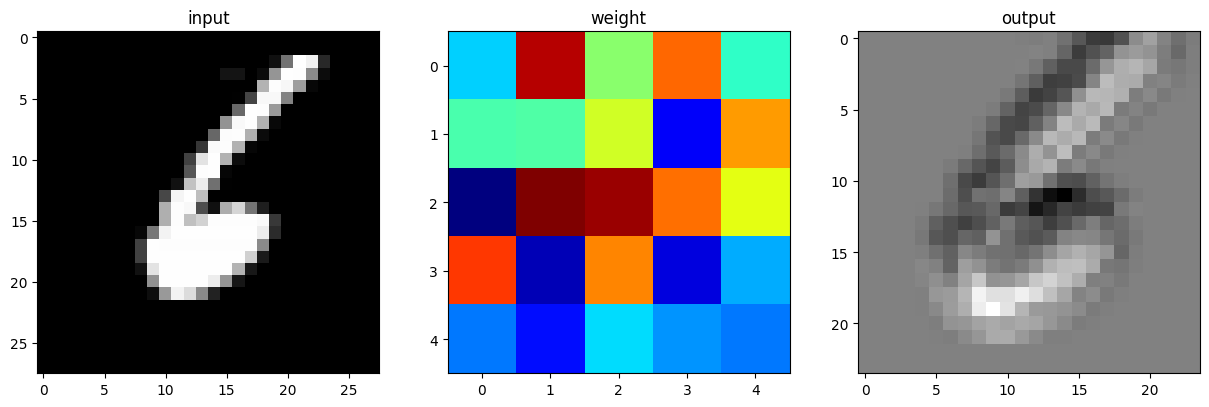

In [31]:
plt.figure(figsize = (15, 30))
plt.subplot(131)
plt.title('input')
plt.imshow(input_image, 'gray')

plt.subplot(132)
plt.title('weight')
plt.imshow(weight[0, 0, :, :], 'jet')

plt.subplot(133)
plt.title('output')
plt.imshow(output_arr[0, 0, :, :], 'gray')

# 풀링 레이어(pooling layer)
  - F.max_pool2d
    - stride
    - kernel_size
  - torch.nn.MaxPool2d 도 많이 사용되는 기법이다

In [32]:
import torch.nn.functional as F

pool = F.max_pool2d(output, 2,2)
pool.shape

torch.Size([1, 20, 12, 12])

In [33]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

- MaxPool layer는 weight가 없기 때문에 바로 numpy 변환 가능

In [34]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

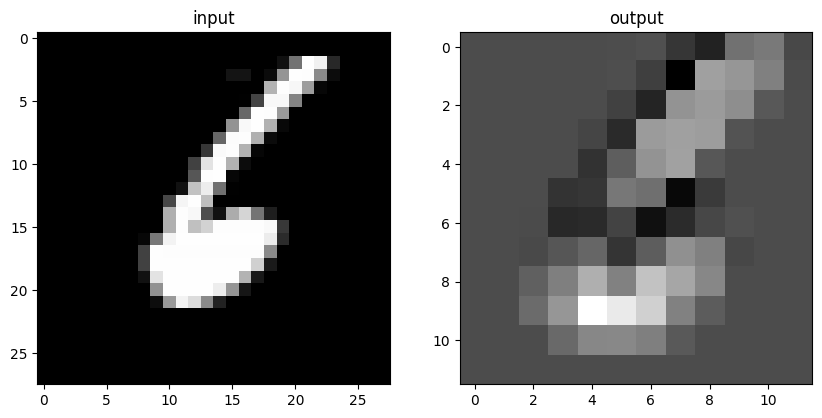

In [37]:
#weight는 볼 필요 없다
plt.figure(figsize = (10, 15))
plt.subplot(121)
plt.title('input')
plt.imshow(input_image, 'gray')

plt.subplot(122)
plt.title('output')
plt.imshow(pool_arr[0, 0, :, :], 'gray')

#풀링레이어를 거치면 해상도가 반으로 줄어든다.

# 선형 레이어(linear layer)
- 1d 만 가능하므로, .view() 를 통해 1d로 펼쳐줘야함 (flatten)

In [38]:
flatten = input_image.view(1,28*28)
flatten.shape

torch.Size([1, 784])

In [39]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [40]:
lin

tensor([[-0.1526, -0.5369, -0.5546, -0.3037,  0.1587,  0.2023, -0.0585,  0.1985,
         -0.1792, -0.2324]], grad_fn=<AddmmBackward0>)

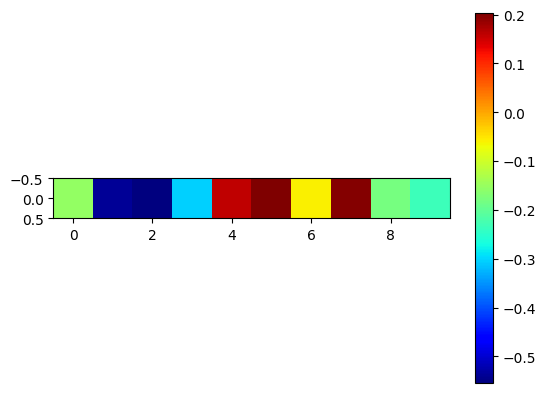

In [42]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

# 비선형 활성화 (non linear activations)
  - F.softmax 와 같은 활성화 함수 등

In [43]:
with torch.no_grad():
  flatten = input_image.view(1,28*28)
  lin = nn.Linear(784, 10)(flatten)
  softmax = F.softmax(lin, dim=1)

softmax

tensor([[0.1073, 0.0597, 0.0915, 0.0694, 0.1384, 0.1058, 0.0755, 0.1207, 0.1093,
         0.1223]])

In [45]:
import numpy as np

np.sum(softmax.numpy()) #softmax 값을 넘파이로 변환

np.float32(1.0)

- F.relu
  - nn.ReLu 로도 사용 가능

In [49]:
# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

inputs = torch.randn(4, 3, 28, 28).to(device)
inputs.shape # Corrected from input.shape

torch.Size([4, 3, 28, 28])

In [50]:
layer = nn.Conv2d(3,20,5,1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

# 신경망 종류

- 위의 레이어들이 모여 결국 신경망을 구성한다

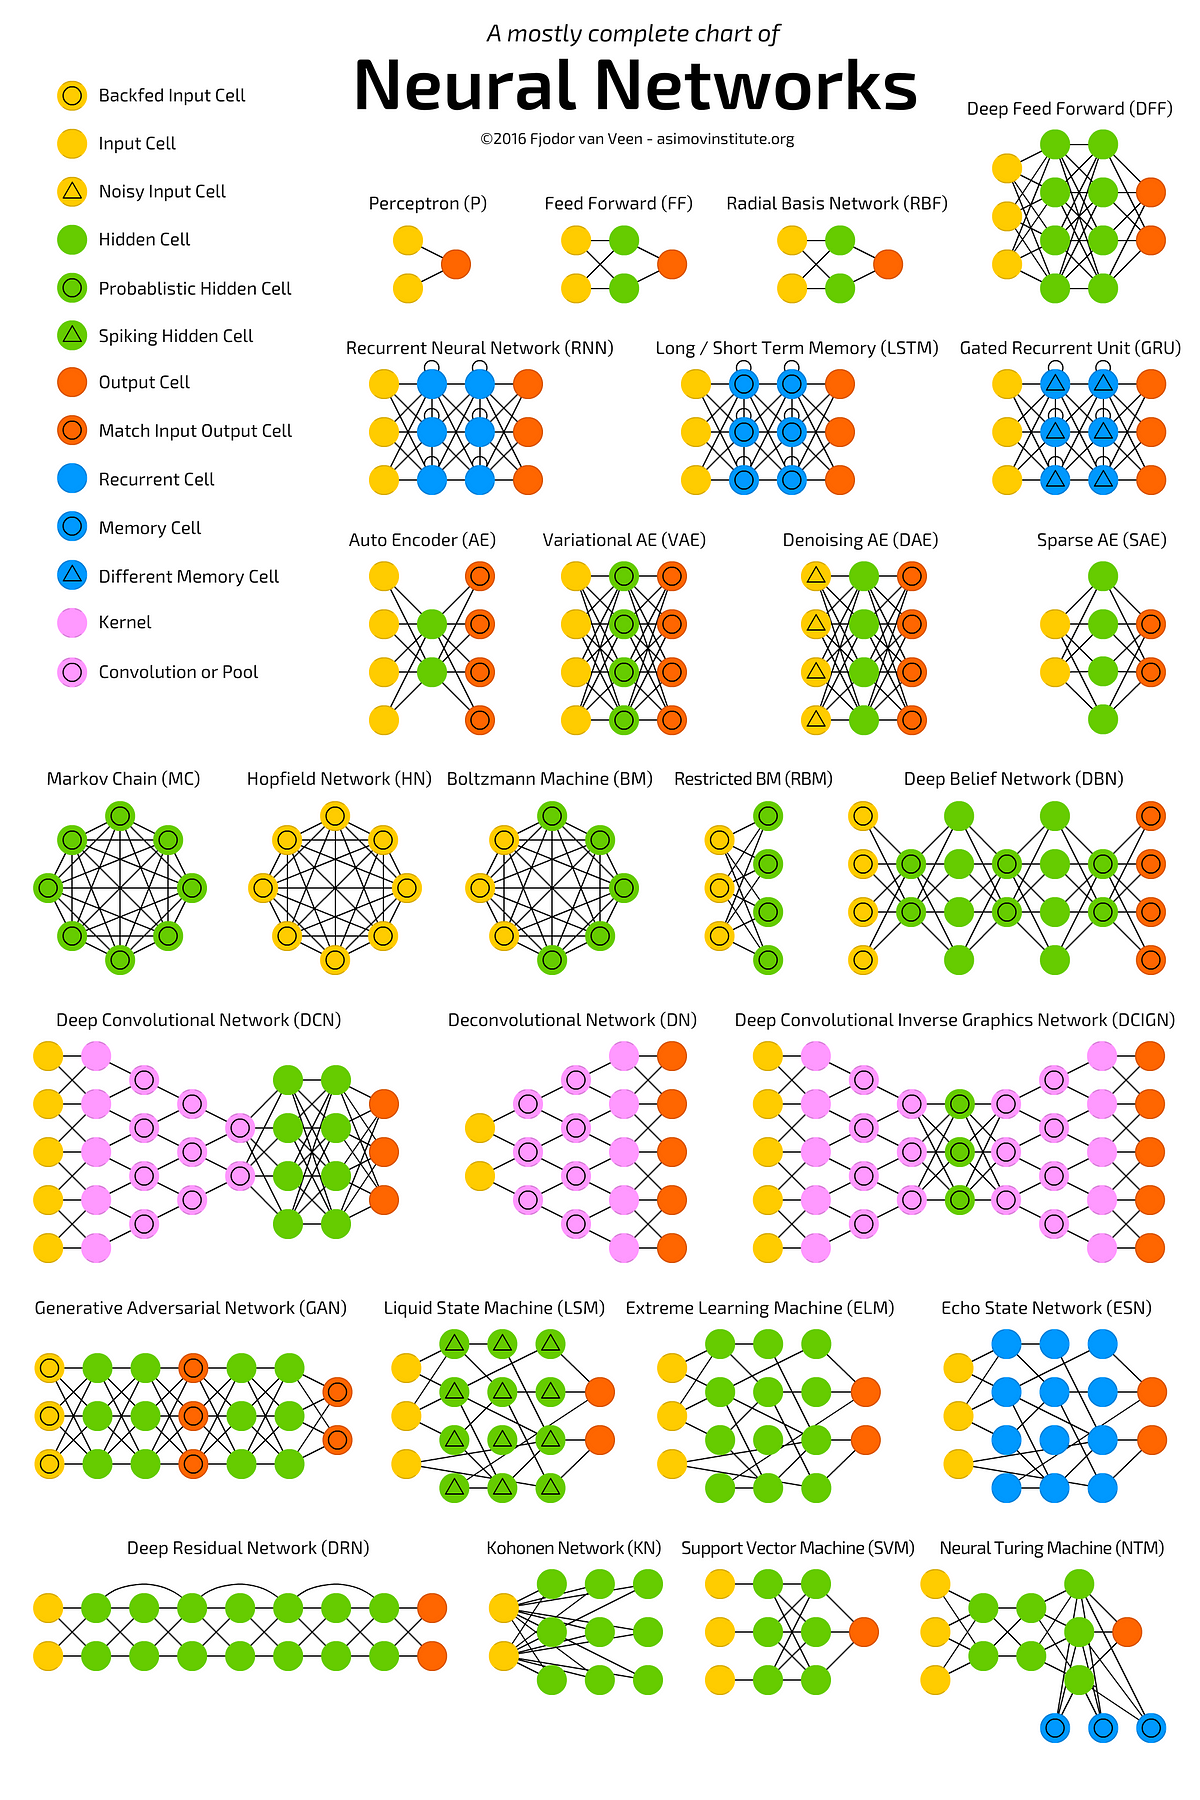

# 모델 정의

- pytorch 에서 딥러닝 모델은 클래스로 정의되고,
- 그 클래스는 반드시 nn.Module 을 상속받아야 함
  - nn.Module 은 pytorch 모델의 기본 뼈대
  - __init__() 안에 모델의 구조 정의
  - forward() 안에 계산 흐름 정의

### nn.Module 상속 클래스 정의
  - nn.module을 상속받는 클래스 정의
  - __init__() : 모델에서 사용될 모듈과 활성화 함수 정의
  - forward() : 모델에서 실행되어야 하는 연산 정의

In [51]:
class Model(nn.Module): #class로 정의하는데, nn.module로 상속받는다
  def __init__(self, inputs):
    super(Model, self).__init__()
    self.layer = nn.Linear(inputs, 1)
    self.activation = nn.Sigmoid()

  def forward(self, x):
    x = self.layer(x)
    x = self.activation(x)
    return x

In [53]:
model = Model(1)
print(list(model.children())) #어떤식으로 구성되어 있는지를 list로 보여줌
print(list(model.modules())) #모델의 모듈을 계층 형식으로 보여줌

[Linear(in_features=1, out_features=1, bias=True), Sigmoid()]
[Model(
  (layer): Linear(in_features=1, out_features=1, bias=True)
  (activation): Sigmoid()
), Linear(in_features=1, out_features=1, bias=True), Sigmoid()]


### nn.Sequential 을 이용한 신경망 정의
- nn.Sequential 객체로 그 안에 각 모듈을 순차적으로 실행
- __init__() 에서 사용할 네트워크 모델들을 nn.sequential로 정의 가능
- forward() 에서 실행되어야 할 계산을 가독성 높게 작성

In [54]:
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2)
    )

    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),  #64 받아서 30으로 출력
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2)
    )

    self.layer3 = nn.Sequential(
        nn.Linear(in_features=30*5*5, out_features=10, bias=True),
        nn.ReLU(inplace=True)
    )

    def forward(self, x):
      x = self.layer1(x)
      x = self.layer2(x)
      x = x.view(x.shape[0], -1)
      x = self.layer3(x)
      return x

In [55]:
#children, modules 를 통해 위에서 설정한 층들이 제대로 적용됐는지 확인
model = Model()
print(list(model.children()))
print(list(model.modules()))

[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]
[Model(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=750, out_features=10, bias=True)
    (1): ReLU(inplace=True)
  )
), Sequential(
  (

# 기본적인 활성화 함수들
- 활성화 함수는 뉴런(노드)에 들어온 값을 어떻게 변형해서 다음 노드로 출력할지 결정하는 함수이다
- '비선형성'(nonlinearity) 을 넣어줘서 복잡한 패턴 학습 가능하게 함

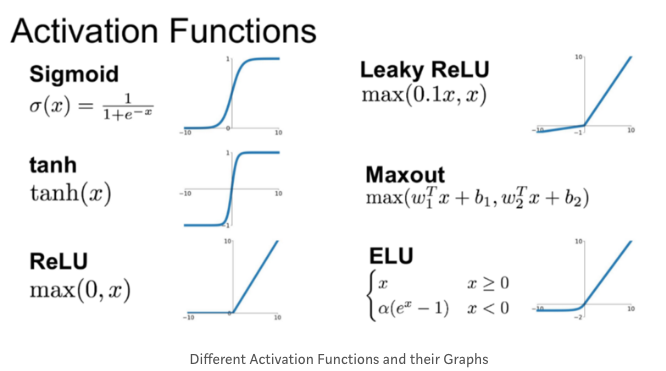

1. 시그모이드
  - 0~1 사이의 값 / 이진 분류 용도
  - 기울기 소멸(vanishing gradient) 문제 발생 : x가 너무 크거나 작으면 기울기 거의 0에 수렴하며 학습이 더 이상 진행안됨 (가중치를 못 바꿈)
  - zero centered임. 즉, 함수값은 0이 중심이 아님. (출력이 모두 양수 즉 bias shift 로 비효율적 학습 됨)

2. tanh(하이퍼볼릭 탄젠트)
  - -1과 1 사이로 중심이 0이라 신호 분산이 적음
  - 시그모이드처럼 vanishing gradient 문제 존재

3. RELU
  - 0 ~ ∞ 범위의 가장 많이 사용되는 활성화 함수
  - 입력이 0을 넘으면 그 입력을 그대로 출력함.
  - 계산 빠르고 기울기가 잘 변화한다 -> 빠른 학습 가능
  - 음수는 모두 0으로 출력되어 , 뉴런이 죽는 현상 존재

4. SOFTMAX
  - 0~1 사이 값들, 전체 합이 1
  - 다중 클래스 분류에서 마지막 출력층으로 사용
  - 각 클래스에 대한 확률로 해석 가능

# 파이토치 사전학습 모델

https://docs.pytorch.org/vision/0.9/models

# 모델 파라미터

### 손실함수(loss function)

- 예측한 값과 실제 값 사이의 오차를 측정 (오차를 줄이기 위해)
- 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표
- 모델이 훈련되는 동안 최소화될 값으로 주어진 문제에 대한 성공 지표
- 손실 함수에 따른 결과를 통해 학습 파라미터 조정
- 최적화 이론에서 최소화 하고자 하는 함수
- 미분 가능한 함수 사용
- 파이토치의 주요 손실 함수
  - torch.nn.BCELoss : 이진 분류 위해 사용
  - torch.nn.CrossEntropyLoss : 다중 클래스 분류
  - torch.nn.MSELoss : 회귀 모델

---
- 활성화 함수 vs 손실함수
  - 활성화함수는 입력값을 비선형으로 바꿔줌 . 모델 내부 (레이어 중간 또는 끝)
    - 시그모이드, 렐루, 탄젠트
  - 손실함수는 출력값과 정답을 비교할 때 사용 . 모델 외부 (예측값 vs 정답 비교)
    - MSE, Crossentropy 등 존재

---
- 손실함수 종류
1. MSE(mean squared error) - 평균 제곱 오차
  - 주로 회귀 문제(가격, 온도 예측 등) 에 사용

2. cross entropy loss
  - 분류 문제에 사용

3. binary cross entropy
  - 이진 분류 문제에 사용
  - 마지막에 sigmoid를 사용해야함 (0~1 출력값 위해)

# 옵티마이저

- 손실함수를 기반으로 손실을 줄이기 위해, '가중치'를 어떻게 바꿀지 결정하는 알고리즘 (특정 종류의 확률적 경사하강법 구현)
  - *** "이렇게 weight를 바꿔보자 !" ***
- optimizer 는 step() 을 통해 전달받은 파라미터를 모델 업데이터
- 모든 옵티마이저의 기본으로 torch.optim.Optimizer(params, defaults) 클래스 사용
- zero_grad() 를 이용해 옵티마이저에 사용된 파라미터들의 기울기를 0으로 설정
- torch.optim.lr_schedular를 이용해 에포크(epochs)에 따라 학습률(lr) 조정
- 파이토치의 주요 옵티마이저
  - optim.Adadelta
  - optim.Adagrad
  - optim.Adam
  - optim.SGD

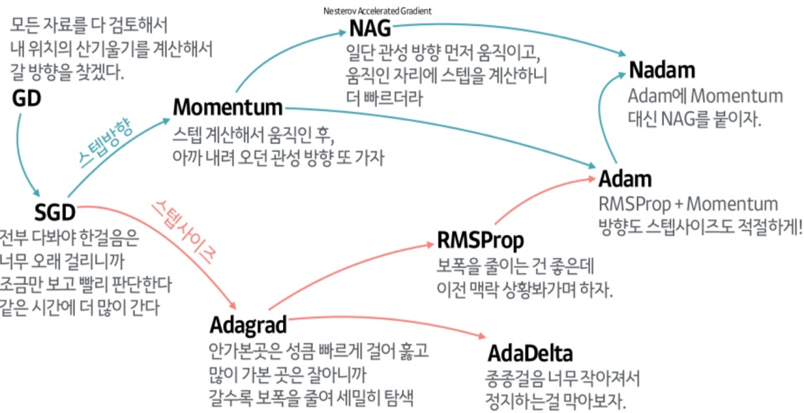

# 학습률 스케줄러(Larning rate scheduler)

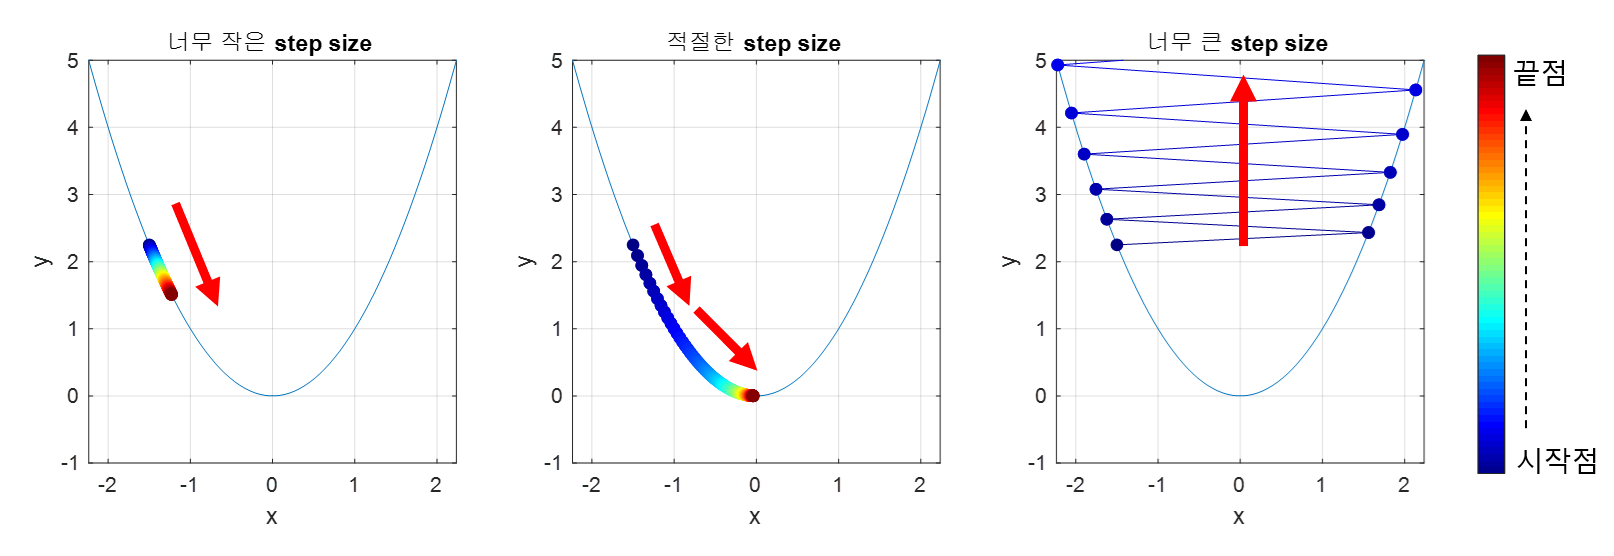

- learning rate : weight를 바꿀 때 얼마나 크게 움질일지 결정 !!
  - 학습률이 너무 크면 금방 발산한다
  - 학습률이 너무 작으면 학습이 너무 느려진다
- 학습률 스케줄러 ?
  - 학습 도중에 자동으로 학습률을 조정해준다
  - ex) scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)


---

- 학습 시 특정 조건에 따라 학습률을 조정하여 최적화 진행
- 일정 횟수 이상이 되면 학습률을 감소(decay)시키거나 전역 최소점(global minimum)근처에 가면 학습률을 줄이는 등
- 파이토치의 학습률 스케줄러 종류
  - optim.lr_schedular.LambdaLR : 람다 함수를 이용해 그 결과를 학습률로 설정
  - optim.lr_schedular.stepLR : 단계 마다 학습률을 감마 비율만큼 감소
  - optim.lr_scheduler.MultistepLR

# 지표 (metrics)

- 모델의 학습과 테스트 단계를 모니터링

In [56]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.5/963.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 675.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [58]:
import torchmetrics
preds = torch.randn(10,5).softmax(dim=-1)
target = torch.randint(5, (10, ))
print(preds, target)

acc = torchmetrics.functional.accuracy(preds, target, task='multiclass', num_classes=5)
print(acc)

tensor([[0.3163, 0.0080, 0.0917, 0.3589, 0.2251],
        [0.1567, 0.1945, 0.0926, 0.0760, 0.4803],
        [0.1802, 0.0496, 0.2738, 0.0857, 0.4107],
        [0.1734, 0.0414, 0.0026, 0.7148, 0.0679],
        [0.0746, 0.0525, 0.4733, 0.1446, 0.2550],
        [0.2026, 0.1604, 0.3458, 0.1197, 0.1715],
        [0.0735, 0.5818, 0.0760, 0.0337, 0.2350],
        [0.2898, 0.2899, 0.2646, 0.0928, 0.0629],
        [0.2246, 0.2134, 0.2647, 0.0941, 0.2032],
        [0.3920, 0.3693, 0.1076, 0.0852, 0.0458]]) tensor([0, 0, 1, 0, 3, 3, 3, 1, 3, 1])
tensor(0.1000)


In [60]:
metric = torchmetrics.Accuracy(task='multiclass', num_classes=5)
n_batches = 10

for i in range(n_batches):
  preds = torch.randn(10,5).softmax(dim = -1)
  target = torch.randint(5, (10, ))

  acc = metric(preds, target)
  print(acc)

  acc = metric.compute()
  print(acc)

tensor(0.2000)
tensor(0.2000)
tensor(0.5000)
tensor(0.3500)
tensor(0.1000)
tensor(0.2667)
tensor(0.4000)
tensor(0.3000)
tensor(0.4000)
tensor(0.3200)
tensor(0.3000)
tensor(0.3167)
tensor(0.1000)
tensor(0.2857)
tensor(0.1000)
tensor(0.2625)
tensor(0.2000)
tensor(0.2556)
tensor(0.1000)
tensor(0.2400)


# 선형 회귀 모델(linear regression model)

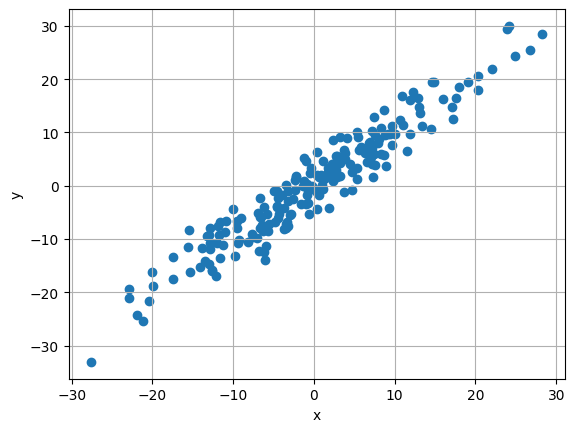

In [62]:
#랜덤으로 linear한 데이터 만들기
X = torch.randn(200, 1) * 10
y = X + 3 * torch.randn(200, 1)
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show() #linear한 데이터를 임의로 생성

### 모델 정의 및 파라미터

- 위에서 했던 것처럼, 파이토치에서 딥러닝 모델은 클래스로 정의하고, module 상속 받는다.
  - __init__, forward

In [65]:
#아주 단순한 LINEAR 회귀 모델
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(LinearRegressionModel, self).__init__() #초기화
    self.linear = nn.Linear(1,1)

  def forward(self, x):
    pred = self.linear(x)
    return pred

In [66]:
model = LinearRegressionModel()
print(model)
print(list(model.parameters()))

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[-0.4989]], requires_grad=True), Parameter containing:
tensor([-0.0581], requires_grad=True)]


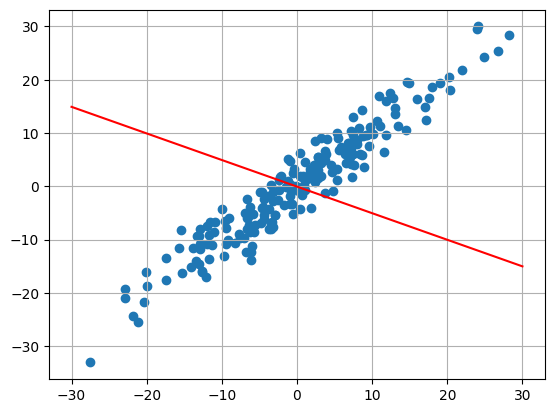

In [67]:
#초기 모델의 파라미터를 확인해보자
w, b = model.parameters()

w1, b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30, 30])
y1 = w1 * x1 + b1

plt.plot(x1, y1, 'r')
plt.scatter(X, y)
plt.grid()
plt.show() #현재 모델의 파라미터는 아래와 같다

### 손실함수 및 옵티마이저

In [68]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001)

### 모델 학습

In [69]:
epochs = 100
losses = [] #학습 수행에 따른 loss 값은 여기에 기록된다
for epoch in range(epochs):
  optimizer.zero_grad() #기울기 초기화

  y_pred = model(X)
  loss = criterion(y_pred, y) #모델의 예측과 실제값의 차이
  losses.append(loss.item())
  loss.backward()  #업데이터

  optimizer.step()

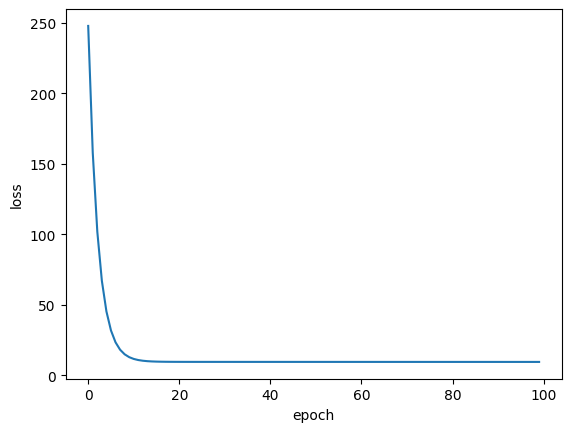

In [70]:
plt.plot(range(epochs), losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

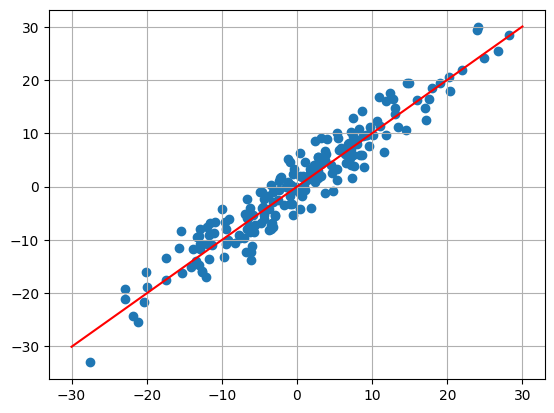

In [71]:
#이제 다시 모델의 파라미터를 확인해보자
w1, b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30, 30])
y1 = w1 * x1 + b1

plt.plot(x1, y1, 'r')
plt.scatter(X, y)
plt.grid()
plt.show()

#선형 예측이 잘 되고 있다

# FashionMNIST 분류 모델

### GPU 설정

In [73]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

### 데이터 로드

In [76]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, ), (0.5, ))])

In [77]:
trainset = datasets.FashionMNIST(root = '/content/',
                                 train=True, download = True,
                                 transform = transform)
testset = datasets.FashionMNIST(root = '/content/',
                                 train=False, download = True,
                                 transform = transform)

100%|██████████| 26.4M/26.4M [00:01<00:00, 17.9MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 305kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.57MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.69MB/s]


In [78]:
train_loader = DataLoader(trainset, batch_size = 128, shuffle = True, num_workers = 2)
test_loader = DataLoader(testset, batch_size = 128, shuffle = False, num_workers = 2)

In [79]:
#데이터 디버깅 (미리보기)
images , labels = next(iter(train_loader))
images.shape, labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

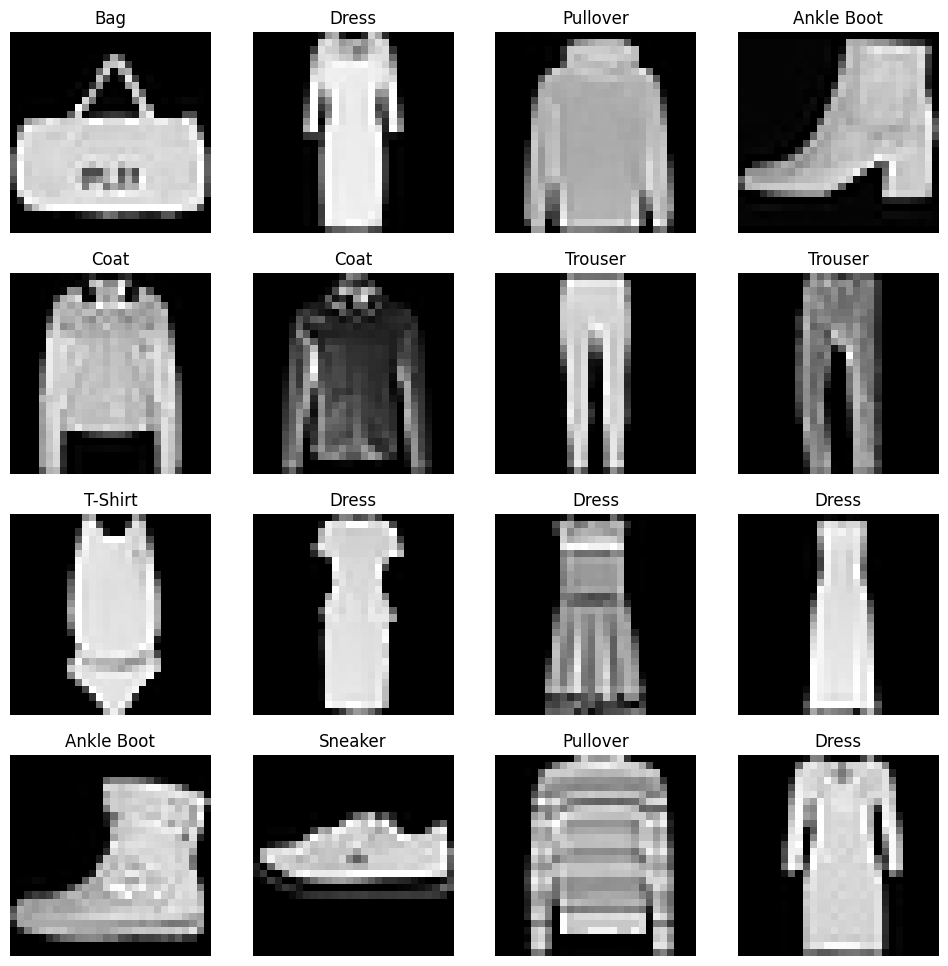

In [80]:
labels_map = {
    0 : 'T-Shirt',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle Boot',
}

figure = plt.figure(figsize = (12,12))
#일부만 출력해서 확인
cols, rows = 4,4
for i in range(1, cols * rows + 1):
  image = images[i].squeeze()
  label_idx = labels[i].item()
  label = labels_map[label_idx]

  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(image, cmap='gray')

plt.show()

### 모델 정의 및 파라미터

In [89]:
class NeuralNet(nn.Module):
  def __init__(self):
    super(NeuralNet, self).__init__()
#in-feature랑 out feature 맞춰주기
    self.conv1 = nn.Conv2d(1, 6, 3)
    self.conv2 = nn.Conv2d(6, 16, 3)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x # Changed from return X

  def num_flat_features(self, x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
      num_features *= s

    return num_features

net = NeuralNet()
print(net)

NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [83]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [85]:
input = torch.randn(1,1,28,28)
out = net(input)
print(out)

tensor([[ -1.6603],
        [  4.0298],
        [ 17.0920],
        [  2.2840],
        [  2.4124],
        [ 10.8739],
        [ -3.6699],
        [  6.5693],
        [  0.3822],
        [  8.6172],
        [ -4.5250],
        [-11.2550],
        [  8.8730],
        [  1.9048],
        [-12.8981],
        [-12.0055],
        [ -7.5359],
        [ 14.8640],
        [ -0.1220],
        [ -4.3761],
        [  0.8571],
        [ -6.8820],
        [ 11.5204],
        [-17.4472],
        [  7.3894],
        [-13.8912],
        [-12.8649],
        [ -2.2247],
        [ 13.0322],
        [ 21.9873],
        [ -9.0479],
        [-27.6054],
        [ -0.5019],
        [ -0.1928],
        [-21.8776],
        [  1.7169],
        [  7.5584],
        [ 13.0932],
        [ -0.9504],
        [  0.6100],
        [ -0.9918],
        [ 12.8240],
        [-11.9059],
        [  7.5012],
        [  7.9356],
        [  1.1117],
        [  3.8140],
        [ -2.3406],
        [ 24.9325],
        [-22.8904],


### 손실함수와 옵티마이저

In [86]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

### 모델 학습

- 배치수 확인

In [87]:
total_batch = len(train_loader)
print(total_batch) #469번이 돌아야

469


In [90]:
for epoch in range(10):
  running_loss = 0.0
  for i, data in enumerate(train_loader, 0):
    inputs, labels = data

    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    if i % 100 == 99:
      print('epoch : {}, iter : {}, loss : {}'.format(epoch+1, i+1, running_loss/2000))
      running_loss = 0.0

epoch : 1, iter : 100, loss : 0.11515998530387879
epoch : 1, iter : 200, loss : 0.11515763461589813
epoch : 1, iter : 300, loss : 0.11515600156784057
epoch : 1, iter : 400, loss : 0.11512387812137603
epoch : 2, iter : 100, loss : 0.11511515533924102
epoch : 2, iter : 200, loss : 0.11516820311546326
epoch : 2, iter : 300, loss : 0.11515163743495942
epoch : 2, iter : 400, loss : 0.11516451632976532
epoch : 3, iter : 100, loss : 0.11514904642105103
epoch : 3, iter : 200, loss : 0.11513848841190338
epoch : 3, iter : 300, loss : 0.11514711391925812
epoch : 3, iter : 400, loss : 0.11517806649208069
epoch : 4, iter : 100, loss : 0.1151628863811493
epoch : 4, iter : 200, loss : 0.11515738213062286
epoch : 4, iter : 300, loss : 0.1151802146434784
epoch : 4, iter : 400, loss : 0.11510537266731262
epoch : 5, iter : 100, loss : 0.11517941117286683
epoch : 5, iter : 200, loss : 0.11513122761249542
epoch : 5, iter : 300, loss : 0.11514607512950897
epoch : 5, iter : 400, loss : 0.11513959038257598
ep

### 모델의 저장 및 로드
- torch.save : net.state_dict() 를 저장
- torch.load : load_state_dict 로 모델을 로드

In [91]:
PATH = '/fashion_mnist.pth'
torch.save(net.state_dict(), PATH)

In [92]:
net = NeuralNet()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [93]:
net.parameters

<bound method Module.parameters of NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

### 모델 테스트

In [94]:
def imshow(image):
  image = image / 2 + 0.5
  npimg = image.numpy()

  fig = plt.figure(figsize = (16, 8))
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()


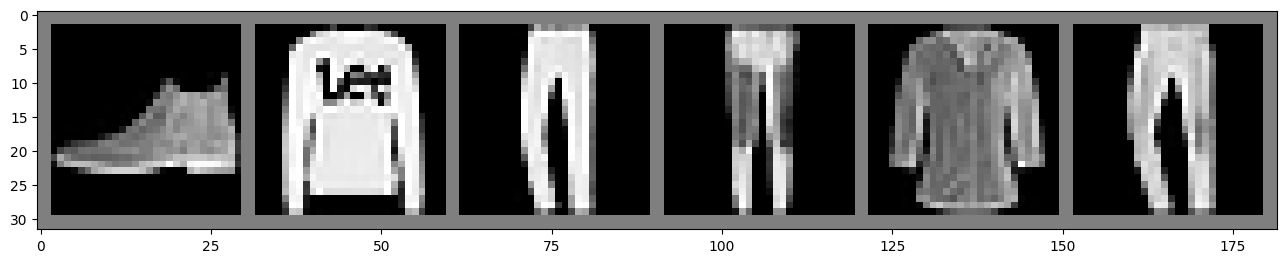

In [96]:
import torchvision

dataiter = iter(test_loader) #test 로더 불러오기
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:6]))

In [99]:
outputs = net(images)

_, predicted = torch.max(outputs, 1)

print(predicted) #예측한 결과값들이 나옴

tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5])


In [100]:
print(''.join('{}, '.format(labels_map[int(predicted[j].numpy())]) for j in range(6)))

Sandal, Sandal, Sandal, Sandal, Sandal, Sandal, 


In [101]:
correct = 0
total = 0
with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(100 * correct / total)

10.0
